Digital audio basics
Audio representation in computers

In [1]:
# import libraries for manipulating arrays and plotting graphs
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
import scipy.io.wavfile as wf

# load an audio file
sr_a, a = wf.read('../audio_files/ah.wav')
# check its shape and sample rate
print('shape of file: ' + str(a.shape) + ' - sample rate: ' + str(sr_a))

shape of file: (32654, 2) - sample rate: 22050


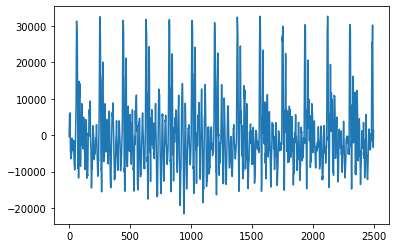

In [3]:
# two columns correspond to left and right channels
# get a small monophonic (left channel) part of it
p = a[15000:17500, 0] # zero-th column means left channel
# and plot it
plt.plot( np.arange( p.size ) , p )

In [4]:
# notice the values:
print('some values of the file: ' + str(p[:100]))
# they are "large" integers, why?
# because quantization - analyzed later...

some values of the file: [  -394   2272   4374   5572   5863   5923   6105   5500   3273   -369
  -3719  -4811  -4850  -5725  -6456  -6361  -5834  -5087  -4975  -5190
  -4348  -2618  -1033   -852  -2421  -3903  -4202  -4183  -4114  -3717
  -3408  -3513  -3812  -4218  -4289  -3355  -1943  -1435  -2655  -4905
  -6592  -7349  -7888  -8589  -9412  -9503  -8848  -8763  -8596  -7511
  -5772  -2701    327   1431   2605   4754   6531   8873  13689  21089
  28236  31248  29881  27190  26208  27586  28251  25042  18345  10137
   1780  -5434  -9114  -7495  -3915  -3837  -7778 -11750 -10932  -3698
   5818  12493  14739  14107  13008  11646  10412  11669  14099  13542
   8528    278  -6779  -8530  -6141  -2879  -1141  -1620  -2539  -2745]


In [5]:
# how can we scale a 16bit-range array (16-bit audio file) to a range of [-1, 1] (as shown in audacity)
# p is a 16-bit array
i16range = np.iinfo(np.int16)
print(repr(i16range))
print(i16range.min)
print(i16range.max)

p_audacity = np.interp( p[:100], (i16range.min, i16range.max), (-1,1) )
print(p_audacity)

iinfo(min=-32768, max=32767, dtype=int16)
-32768
32767
[-0.01200885  0.06935225  0.13350118  0.1700618   0.17894255  0.18077363
  0.18632792  0.1678645   0.09990082 -0.0112459  -0.11348135 -0.14680705
 -0.14799725 -0.17470054 -0.19700923 -0.19411002 -0.17802701 -0.15523003
 -0.15181201 -0.15837339 -0.1326772  -0.07988098 -0.03150988 -0.02598611
 -0.07386893 -0.11909667 -0.12822156 -0.12764172 -0.12553597 -0.11342031
 -0.10399023 -0.10719463 -0.11631952 -0.12870985 -0.13087663 -0.10237278
 -0.0592813  -0.04377813 -0.08101015 -0.14967575 -0.20115969 -0.22426184
 -0.24071107 -0.26210422 -0.28722057 -0.28999771 -0.27000839 -0.26741436
 -0.26231785 -0.22920577 -0.17613489 -0.08241398  0.00999466  0.04368658
  0.07951476  0.14509804  0.1993286   0.27080186  0.41777676  0.64361028
  0.86172274  0.95364309  0.91192493  0.82980087  0.79983215  0.84188602
  0.86218051  0.76424811  0.55986877  0.30937667  0.05433738 -0.16581979
 -0.27812619 -0.22871748 -0.11946288 -0.11708248 -0.23735409 -0.35857

In [6]:
# before that, let's check out a "smoother" waveform
import sounddevice as sd
sr_w, w = wf.read('../audio_files/whistling.wav')
print('shape of file: ' + str(w.shape) + ' - sample rate: ' + str(sr_w))
sd.play(w,sr_w)

shape of file: (45774, 2) - sample rate: 22050


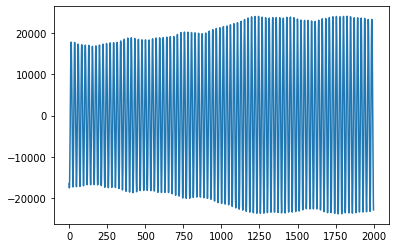

In [7]:
# get a part of it
p = w[15000:17000, 0]
# and plot it
plt.plot( np.arange( p.size ) , p )

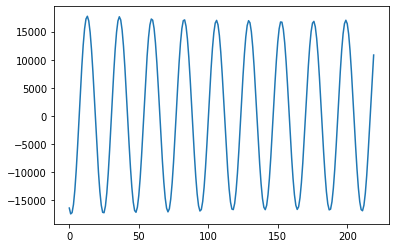

In [8]:
# let's zoom in a bit more
# get a part of it
p = w[15000:15220, 0]
# and plot it
plt.plot( np.arange( p.size ) , p )

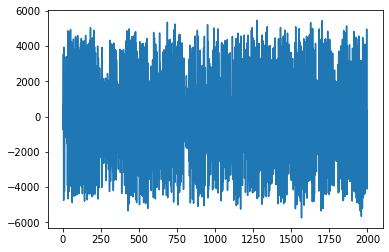

In [9]:
# now, let's get a rough waveform
sr_w, w = wf.read('../audio_files/noise.wav')

p = w[15000:17000, 0]
# and plot it
plt.plot( np.arange( p.size ) , p )

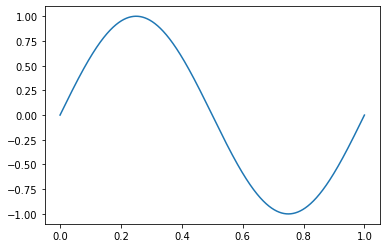

In [10]:
# initialise 'time' array
t = np.arange(44100)/44100
# make a sinusoidal
s = np.sin( 2*np.pi*t )
# plot it
plt.plot( t, s )

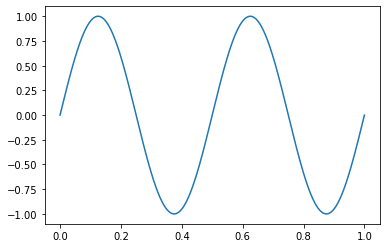

In [11]:
# change frequency, e.g. 2
# set frequency
f = 2
# make sinusoidal with new frequency
s = np.sin( 2*np.pi*f*t )
# and plot it
plt.plot( t, s )

In [12]:
# let's listen to some audio
import sounddevice as sd
# set frequency
f = 440
# make sinusoidal with new frequency
s = np.sin( 2*np.pi*f*t )
# and play it
sd.play( s , 44100 )

In [13]:
# we can also make a wav file out of it
import scipy.io.wavfile as wf
wf.write('../audio_files/test1.wav', 44100, s)
# you can open saved wav file in Audacity to check it out

<IPython.core.display.Javascript object>


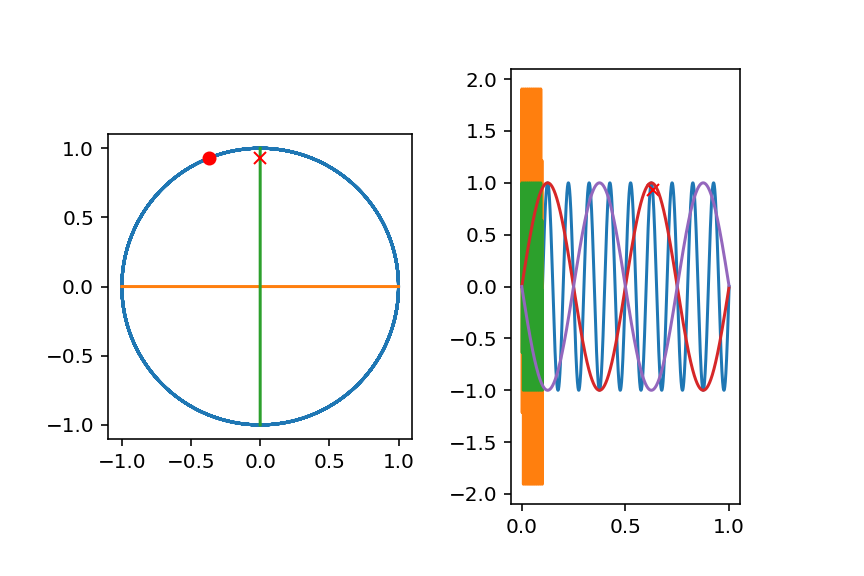

interactive(children=(FloatSlider(value=0.0, description='t_v', max=1.0, step=0.001), Output()), _dom_classes=…

<function __main__.change_time_value(t_v=0.0)>

In [14]:
%matplotlib notebook
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

sr = 44100
t = np.arange( sr )/sr
t_value = 0.0
# set frequency
f = 10
# make sinusoidal with new frequency
s = np.sin( 2*np.pi*f*t )
# plot sinusoidal in phase and time space
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.set_aspect('equal', adjustable='box')
plt.plot( np.cos( 2*np.pi*f*t ) , s )
plt.plot( 1-2*t , np.zeros( t.size ) )
plt.plot( np.zeros( t.size ) , 1-2*t )
# plt.plot( np.cos( 2*np.pi*f*t_value ) , np.sin( 2*np.pi*f*t_value ) , 'rx' )
unit_plot, = ax1.plot( np.cos( 2*np.pi*f*t_value ) , np.sin( 2*np.pi*f*t_value ) , 'ro' )
sine_plot, = ax1.plot( 0 , np.sin( 2*np.pi*f*t_value ) , 'rx' )
ax2 = fig.add_subplot(122)
plt.plot( t , s )
# plt.plot( t_value , np.sin( 2*np.pi*f*t_value ) , 'rx' )
time_plot, = ax2.plot( t_value , np.sin( 2*np.pi*f*t_value ) , 'rx' )
ax2.set_aspect(1.0/ax2.get_data_ratio(), adjustable='box')

def change_time_value(t_v=0.0):
    unit_plot.set_ydata( np.sin( 2*np.pi*f*t_v ) )
    unit_plot.set_xdata( np.cos( 2*np.pi*f*t_v ) )
    sine_plot.set_ydata( np.sin( 2*np.pi*f*t_v ) )
    time_plot.set_ydata( np.sin( 2*np.pi*f*t_v ) )
    time_plot.set_xdata( t_v )
    print('t_value 1 : ' + str(t_v))
    # fig.canvas.draw()
    fig.show()
    return t_v

# w = widgets.IntSlider(min=0, max=50, step=1, value=10)
# display(w)
interact(change_time_value, t_v=widgets.FloatSlider(min=0.0, max=1.0, step=0.001, value=0.0))

In [15]:
# add harmonics
f1 = 220
f2 = (3/2)*220
s1 = np.sin( 2*np.pi*f1*t )
s2 = np.sin( 2*np.pi*f2*t )
# plot them as they would sound together, i.e., plot sum
s = s1 + s2
# for clarity, plot the first 1/10 of a second
plt.plot( t[:4410] , s[:4410] )
# normalise to avoid excessive range
s /= np.max( np.abs(s) )
plt.plot( t[:4410] , s[:4410] )
sd.play( s , 44100 )

In [16]:
# Sampling rate - aliasing - sampling (Nyquist) theorem
# assume a sample rate of 1000, i.e. sampling 1000 times per second
sr = 1000
# construct a 1-sec time array that corresponds to this sample rate
t = np.arange(sr)/sr # question: how can we represent 2 seconds of audio? 2.3 secs?
# let's construct an audio array of one second with frequency 2
f = 2
s = np.sin( 2*np.pi*f*t )
plt.plot( t , s )

In [17]:
# now let's construct an audio array of one second with frequency 998
f = 998
s = np.sin( 2*np.pi*f*t )
plt.plot( t , s )
# what's going on?

<IPython.core.display.Javascript object>


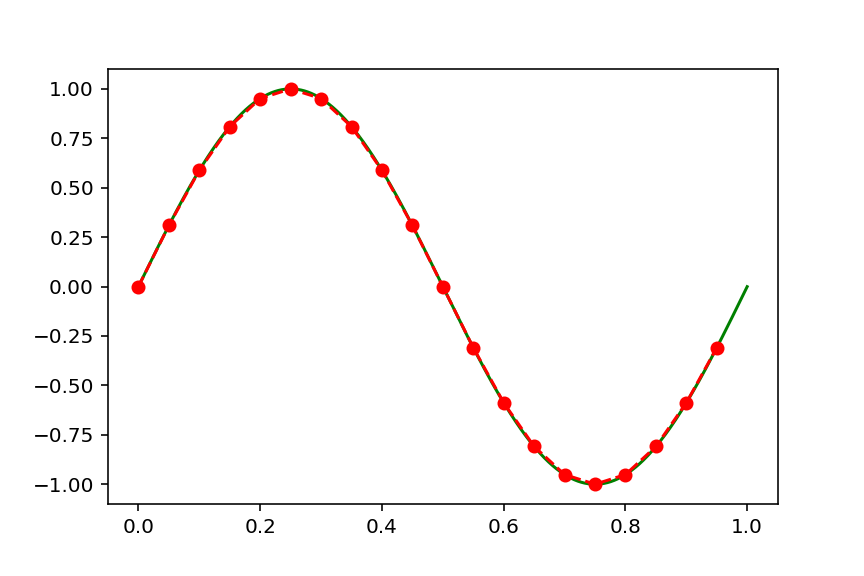

interactive(children=(IntSlider(value=0, description='f', max=50), Output()), _dom_classes=('widget-interact',…

<function __main__.change_freq(f=2)>

In [19]:
# see the following link to activate the interactive environment:
# https://ipywidgets.readthedocs.io/en/latest/user_install.html
# if using conda, make sure last version of matplolib is installed in conda
# conda install matplotlib
# conda update matplolib
%matplotlib notebook
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# assume an the approximation of an analog signal, using higher sample rate
analog_sr = 10000
# assume 1 second of an 'analog' recording
analog_t = np.arange( analog_sr )/analog_sr
# with frequency 50
f_real = 2
analog_s = np.sin( 2*np.pi*f_real*analog_t )
# plot it
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
line_analog, = ax.plot( analog_t , analog_s, 'g' )
# assume that we are sampling at 100
digital_sr = 20
digital_t = np.arange( digital_sr )/digital_sr
# from analog_s, sample
digital_idxs = np.floor( digital_t*analog_sr ).astype(int)
digital_s = analog_s[ digital_idxs ]
line_digital, = ax.plot( digital_t , digital_s, 'ro--' )
# plt.savefig('aliasing.png', dpi=300)

def change_freq(f=2):
    analog_s = np.sin( 2*np.pi*f*analog_t )
    line_analog.set_ydata( analog_s )
    digital_s = analog_s[ digital_idxs ]
    line_digital.set_ydata( digital_s )
    # fig.canvas.draw()
    fig.show()
    return f

# w = widgets.IntSlider(min=0, max=50, step=1, value=10)
# display(w)
interact(change_freq, f=widgets.IntSlider(min=0, max=50, step=1, value=0))

<IPython.core.display.Javascript object>


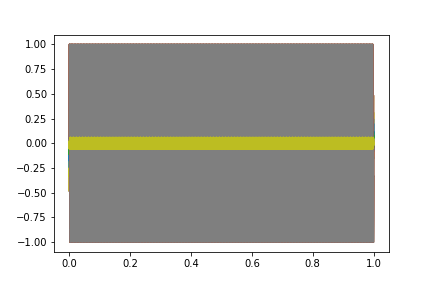

In [32]:
import time
# but the values of the audio samples per se are also digital
# the available values are defined by bitrate
sr = 44100
t = np.arange( sr )/sr
# set frequency
f = 200
# make sinusoidal with new frequency
s = np.sin( 2*np.pi*f*t )
fig = plt.figure()
# plot a small part
n = 441
plt.plot( t[:n] , s[:n] )
# assume 2-bit audio: 00, 01, 10, 11
s_2bit = np.floor( np.interp( s, (-1, 1), (0, 3.9999) ) )
s_2bit = np.interp( s_2bit, (0, 3), (-1, 1) )
plt.plot( t[:n] , s_2bit[:n] )
quant_noise = s - s_2bit
plt.plot( t[:n] , quant_noise[:n] )
# np.iinfo(np.int16).min

# remove comments to listen:
# initial audio
sd.play( s , sr )
time.sleep(1.5)
# 2bit quantized
sd.play( s_2bit , sr )
time.sleep(1.5)
# residual noise
sd.play( quant_noise , sr )


<IPython.core.display.Javascript object>


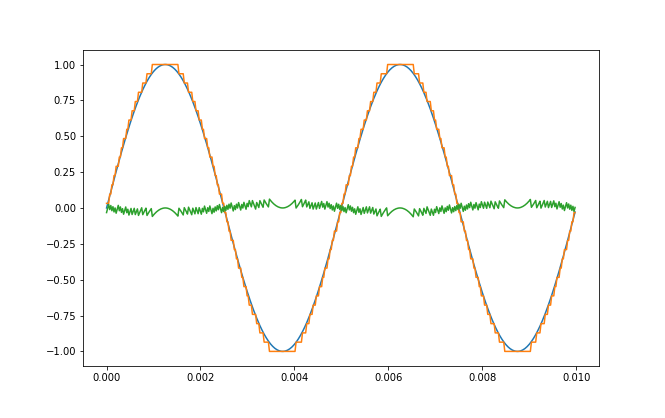

<IPython.core.display.Javascript object>

In [47]:
# assume n-bit audio
# set frequency
import time
f = 200
sr = 44100
t = np.arange( sr )/sr
# make sinusoidal with new frequency
s = np.sin( 2*np.pi*f*t )
bits_n = 5
s_nbit = np.floor( np.interp( s, (-1, 1), (0, 2**bits_n) ) )
s_nbit[ s_nbit >= 2**bits_n ] = (2**bits_n)-1
s_nbit = np.interp( s_nbit, (0, (2**bits_n)-1), (-1, 1) )
plt.plot( t , s_nbit )
quant_noise = s - s_nbit
plt.plot( t , quant_noise )
# np.iinfo(np.int16).min

fig = plt.figure()
plt.plot( t[:441] , s[:441] )
plt.plot( t[:441] , s_nbit[:441] )
plt.plot( t[:441] , quant_noise[:441] )
plt.show()

# just for running next cell
from IPython.display import Javascript
Javascript("var output_area = this; var cell_element = output_area.element.parents('.cell'); var cell_idx = Jupyter.notebook.get_cell_elements().index(cell_element); Jupyter.notebook.execute_cells([cell_idx+1]);")

Signal-to-noise ratio (SNR) indicates how much of the signal is "lost" or how much noise is added to the original signal by a process (e.g., long cable leakage, or poor microphone quality, or quantization). In the case of quantization, SNR is measured by dividing the dBs of the "green" line with the dBs of the blue line.

In [48]:
sd.play( s , sr )
time.sleep(1.5)
sd.play( s_nbit , sr )
time.sleep(1.5)
sd.play( quant_noise , sr )